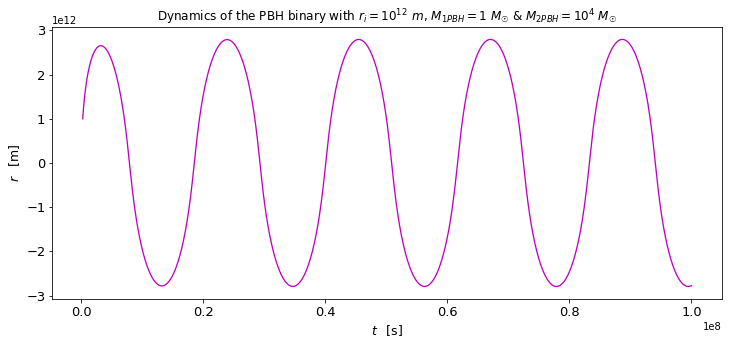

In [2]:
# Reference research paper "The merger rate of primordial-black-hole binaries".

# Dynamics of the PBH binaries with PBHs of masses, M_1PBH & M_2PBH at an initial separation of r_i=1e12m
# M_1PBH = 1 M☉ &  M_2PBH = 100 M☉.
# This binary is not having DM halos around the PBHs.

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.integrate import odeint
import math

π=3.14
t_eq=1.59246e12       # in units of seconds
ρ_eq=2.15368e-16      # in units of kg.m^-3
G=6.67e-11            # in units of m^3.kg^-1.s^-2
M_solar=1.989e30      # in units of kg

M_1PBH=1*M_solar      # in units of M☉. 
M_2PBH=1e4*M_solar    # in units of M☉.


def f(u,t):    #Eq.(4) in "PBH-binary" notes.
    return [u[1], (((-G*(M_1PBH+M_2PBH)*u[0])/((u[0]**2+b**2)**(3/2))) - (u[0]/(4*t**2)))]
                    
b= 1e12
r0= [1e12,2.12044e6]
ts= np.linspace(2.358e5,1e8,2000)
us= odeint(f,r0,ts)
rs= us[:,0]

plt.figure(figsize=(12,5))
plt.rc('lines', linewidth=1.3)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)

plt.plot(ts,rs,'m')
plt.xlabel('$t$ $\hspace{0.5}$[s]',fontsize=12.5)
plt.ylabel('$r$$\hspace{0.5}$ [m]',fontsize=12.5)


plt.title('Dynamics of the PBH binary with $r_{i}=10^{12}\hspace{0.4}m$, $M_{1PBH} = 1\hspace{0.3} M_{☉}$ & $M_{2PBH} = 10^{4}\hspace{0.3} M_{☉}$')
plt.show()

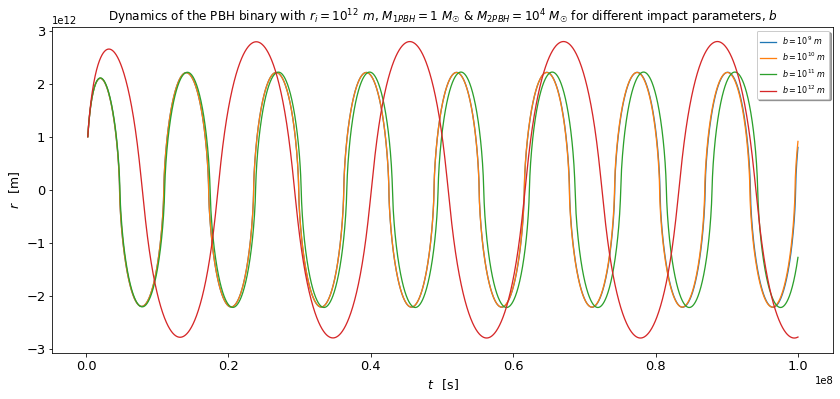

In [3]:
# Solution of eq.(4) in "PBH-binary"-notes, for different impact parameters, b and r_i=1e12m initial 
# separation between the PBHs in the binary (without DM halos).
 
plt.figure(figsize=(14,6))

M_1PBH=1*M_solar      # in units of M☉. 
M_2PBH=1e4*M_solar    # in units of M☉.




b=1e9
while b<1e13:
    def f(u,w):   #Eq.(4) in "PBH-binary" notes.
        return [u[1], (((-G*(M_1PBH+M_2PBH)*u[0])/((u[0]**2+b**2)**(3/2))) - (u[0]/(4*w**2)))]
    r0= [1e12,2.12044e6]
    ws= np.linspace(2.358e5,1e8,3000)
    us= odeint(f,r0,ws)
    rs= us[:,0]
    plt.plot(ws,rs,'')
    b*=10

    

plt.rc('lines', linewidth=1.3)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)

plt.xlabel('$t$ $\hspace{0.5}$[s]',fontsize=12.5)
plt.ylabel('$r$$\hspace{0.5}$ [m]',fontsize=12.5)
    
    
    
plt.title('Dynamics of the PBH binary with $r_{i}=10^{12}\hspace{0.4}m$, $M_{1PBH} = 1\hspace{0.3} M_{☉}$ & $M_{2PBH} = 10^{4}\hspace{0.3} M_{☉}$ for different impact parameters, $b$')
plt.legend(["$b=10^{9}\hspace{0.3}m$","$b=10^{10}\hspace{0.3}m$","$b=10^{11}\hspace{0.3}m$","$b=10^{12}\hspace{0.3}m$"],prop = {'size':8}, facecolor = 'white',loc='upper right', shadow = True,fontsize=33) 
plt.savefig("2.pdf")
plt.show()

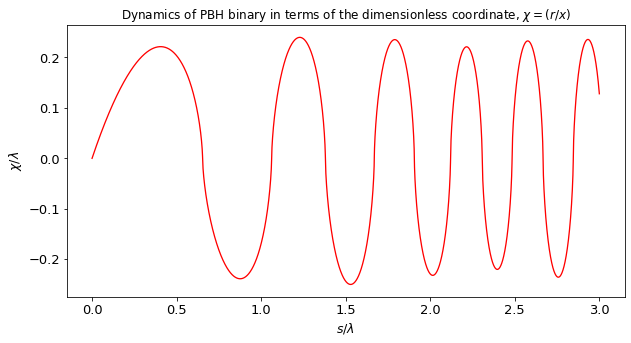

In [4]:
# Reference research paper "The merger rate of primordial-black-hole binaries".

# Dynamics of the PBH binaries in terms of the dimensionless coordinate, χ=(r/x) for λ=1 using 
# impact parameter, b=10^{-6}.
# λ=(8πρ_eqx^3)/3(M_1PBH+M_2PBH).


def h(x):
    return math.sqrt((x**-3)+(x**-4))
def g(x):
        return  -((3*x+4)/(2*h(x)*(x**5))) #g(x)=h'(x).
    
    

def f(u,s):    #Eq.(16) in "PBH-binary" notes.
    return [u[1], -((s*g(s)+h(s))*((s*u[1]-u[0]))/(h(s)*s**2))-((u[0])/((((h(s)*s)**2))*λ
            *((u[0]**2+b**2)**(3/2))))] 
                                       
    
λ=1
b=1e-6
separation0= [1e-12,1]
ss= np.linspace(1e-12,3,1000000) 
us= odeint(f,separation0,ss)
separations= us[:,0]
As=ss/λ
Bs=separations/λ


plt.figure(figsize=(10,5))
plt.rc('lines', linewidth=1.3)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)

plt.plot(As,Bs,'r')
plt.xlabel('$s/λ$',fontsize=12.5)
plt.ylabel('$χ/λ$',fontsize=12.5)
plt.title('Dynamics of PBH binary in terms of the dimensionless coordinate, $χ=(r/x)$')
plt.show()

b= 1.0e-06 χ/λ_0= 0.258
b= 1.0e-05 χ/λ_0= 0.235
b= 1.0e-04 χ/λ_0= 0.235
b= 1.0e-03 χ/λ_0= 0.243
b= 1.0e-02 χ/λ_0= 0.292


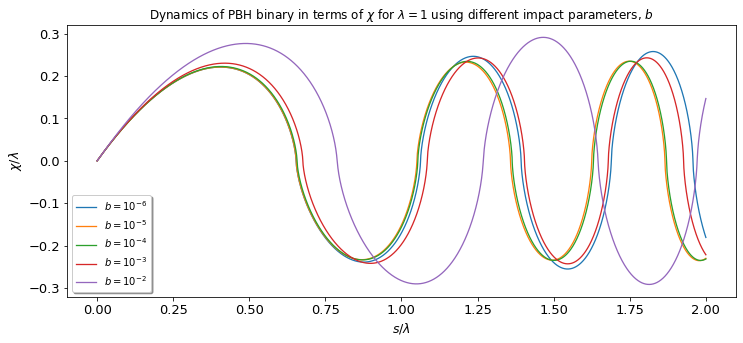

In [5]:
# Dynamics of the PBH binaries in terms of the dimensionless coordinate, χ=(r/x) for λ=1 using different 
# impact parameters.

# λ=(8πρ_eqx^3)/3(M_1PBH+M_2PBH).

fig = plt.figure(figsize=(12, 5))

b=1e-6    
while b<1e-1:
    def f(u,s):   # Eq.(16) in "PBH-binary" notes.
        return [u[1], -((s*g(s)+h(s))*((s*u[1]-u[0]))/(h(s)*s**2))-((u[0])/((((h(s)*s)**2))*
                                                            λ*((u[0]**2+b**2)**(3/2))))]
    λ=1
    separation0= [1e-10,1]
    ss= np.linspace(1e-10,2,1000000) 
    us= odeint(f,separation0,ss)
    separations= us[:,0]
    As=ss/λ
    Bs=separations/λ
    Bs_max=np.max(Bs)
    print("b=",'%.1e'%b,"χ/λ_0=",'%.3f'%Bs_max)
    plt.plot(As,Bs,'')
    b*=10


plt.rc('lines', linewidth=1.3)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)


plt.xlabel('$s/λ$',fontsize=12.5)
plt.ylabel('$χ/λ$',fontsize=12.5)
    
plt.title('Dynamics of PBH binary in terms of $χ$ for $λ=1$ using different impact parameters, $b$')
plt.legend(["$b=10^{-6}\hspace{0.3}$","$b=10^{-5}\hspace{0.3}$","$b=10^{-4}\hspace{0.3}$","$b=10^{-3}\hspace{0.3}$","$b=10^{-2}\hspace{0.3}$"],
           prop = {'size':10}, facecolor = 'white',loc='lower left', shadow = True,fontsize=39) 


plt.savefig("3.pdf")
plt.show()


# The graph clearly shows that, to solve the PBH binary equation in terms of the dimensionless coordinates,
# χ:- the adequate choice of impact parameter, b for λ=1 is b=10^{-4}.

b= 1.0e-07 χ/λ_0= 0.208
b= 1.0e-06 χ/λ_0= 0.208
b= 1.0e-05 χ/λ_0= 0.215
b= 1.0e-04 χ/λ_0= 0.254
b= 1.0e-03 χ/λ_0= 0.452


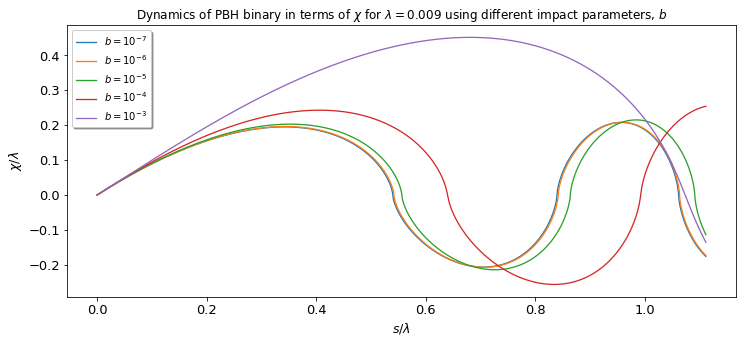

In [6]:
# Eq.(6) in "The merger rate of primordial-black-hole binaries" and eq.(16) in "PBH-binary" notes.

# Dynamics of the PBH binaries in terms of the dimensionless coordinate, χ=(r/x) for different 
# impact parameters,b.


# Solution of the equation of the PBH binary in terms of the dimensionless coordinate, χ=(r/x) for λ<<1 i.e. λ=0.009(say) which correspods to 
# in the radiation domination era.

# λ=(8πρ_eqx^3)/3(M_1PBH+M_2PBH).

fig = plt.figure(figsize=(12, 5))

b=1e-7    
while b<1e-2:
    def f(u,s):        #Eq.(16) in "PBH-binary" notes.
        return [u[1], -((s*g(s)+h(s))*((s*u[1]-u[0]))/(h(s)*s**2))-((u[0])/((((h(s)*s)**2))*
                                                            λ*((u[0]**2+b**2)**(3/2))))]
    λ=0.009
    separation0= [1e-12,1]
    ss= np.linspace(1e-12,1e-2,6000) 
    us= odeint(f,separation0,ss)
    separations= us[:,0]
    As=ss/λ
    Bs=separations/λ
    Bs_max=np.max(Bs)
    print("b=",'%.1e'%b,"χ/λ_0=",'%.3f'%Bs_max)
    plt.plot(As,Bs,'')
    b*=10


plt.rc('lines', linewidth=1.3)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)


plt.xlabel('$s/λ$',fontsize=12.5)
plt.ylabel('$χ/λ$',fontsize=12.5)
    
plt.title('Dynamics of PBH binary in terms of $χ$ for $λ=0.009$ using different impact parameters, $b$')
plt.legend(["$b=10^{-7}\hspace{0.3}$","$b=10^{-6}\hspace{0.3}$","$b=10^{-5}\hspace{0.3}$","$b=10^{-4}\hspace{0.3}$","$b=10^{-3}\hspace{0.3}$"],
           prop = {'size':10}, facecolor = 'white',loc='upper left', shadow = True,fontsize=39) 


plt.savefig("4.pdf")
plt.show()


#The graph clearly shows that, to solve the PBH binary equation in terms of the dimensionless coordinates, χ:- the adequate choice 
#of impact parameter, b for λ<<1 i.e. λ=0.009  is b=10^{-6}.

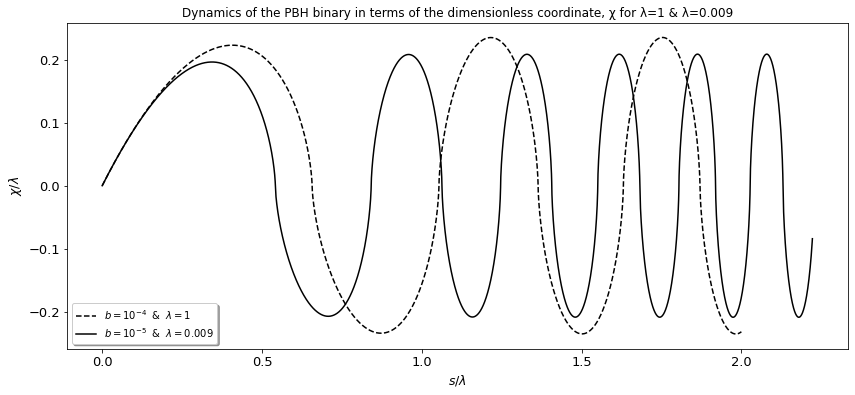

In [7]:
# Reproducing FIG. 1  of Reference paper "The merger rate of primordial-black-hole binaries".


#Eq.(16) in "PBH-binary" notes for λ=1.
def f(u,s):         
        return [u[1], -((s*g(s)+h(s))*((s*u[1]-u[0]))/(h(s)*s**2))-((u[0])/((((h(s)*s)**2))*
                                                            λ*((u[0]**2+b**2)**(3/2))))]
                      
λ=1
b=1e-4
separation0= [1e-10,1]
ss= np.linspace(1e-10,2,10000) 
us= odeint(f,separation0,ss)
separations= us[:,0]
As=ss/λ
Bs=separations/λ



#Eq.(16) in "PBH-binary" notes for λ<<1 i.e. λ=0.009(say) which corresponds to the radiation domination era.
def j(n,p):
    return [n[1], -((p*g(p)+h(p))*((p*n[1]-n[0]))/(h(p)*p**2))-((n[0])/((((h(p)*p)**2))*
                                                            λ*((n[0]**2+c**2)**(3/2))))]
                   
z0= [1e-12,1]
λ=0.009
c=1e-6
ps= np.linspace(1e-12,2e-2,6000) 
ns= odeint(j,z0,ps)
zs= ns[:,0]
Ps=ps/λ
Zs=zs/λ

plt.figure(figsize=(14, 6))
plt.rc('lines', linewidth=1.5)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)


plt.plot(As,Bs,'k--')
plt.plot(Ps,Zs,'k')
plt.xlabel('$s/λ$',fontsize=12.5)
plt.ylabel('$χ/λ$',fontsize=12.5)
plt.legend(["$b=10^{-4}\hspace{0.6} & \hspace{0.6} λ=1 $","$b=10^{-5}\hspace{0.6}& \hspace{0.6} λ=0.009$"],
           prop = {'size':10}, facecolor = 'white',loc='lower left', shadow = True,fontsize=39)                                                                                            
plt.title('Dynamics of the PBH binary in terms of the dimensionless coordinate, χ for λ=1 & λ=0.009') 


plt.savefig("5.pdf")
plt.show()


# The graph shows that, in the limit λ<<1, the PBH pair effectively decouples from the Hubble expansion 
# deep in the radiation-domination era corresponding to s<<1. In this case, the  binary effectively 
# decouples from the Hubble flow at s ≈ λ/3.


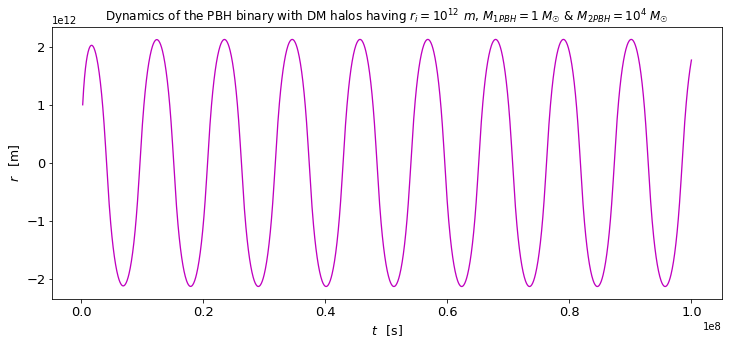

In [8]:
# Dynamics of the PBH binaries with PBHs of masses, M_1PBH & M_2PBH at an initial separation of r_i=1e12m,
# M_1PBH = 1 M☉ &  M_2PBH = 100 M☉ having DM halos of sizes equal to their own.

# Using impact parameter, b=10^{12}.

M_1PBH=1*M_solar      # in units of M☉. 
M_2PBH=1e4*M_solar    # in units of M☉.

M_1halo=1*M_solar      # in units of M☉. 
M_2halo=1e4*M_solar    # in units of M☉.

def f(u,t):   #Eq.(33) in "PBH-binary" notes.
    return [u[1], (((-G*(M_1PBH+M_2PBH+M_1halo+M_2halo)*u[0])/((u[0]**2+b**2)**(3/2))) - (u[0]/(4*t**2)))]
                    
b= 1e12
r0= [1e12,2.12044e6]
ts= np.linspace(2.358e5,1e8,2000)
us= odeint(f,r0,ts)
rs= us[:,0]

plt.figure(figsize=(12,5))
plt.rc('lines', linewidth=1.3)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)

plt.plot(ts,rs,'m')
plt.xlabel('$t$ $\hspace{0.5}$[s]',fontsize=12.5)
plt.ylabel('$r$$\hspace{0.5}$ [m]',fontsize=12.5)


plt.title('Dynamics of the PBH binary with DM halos having $r_{i}=10^{12}\hspace{0.4}m$, $M_{1PBH} = 1\hspace{0.3} M_{☉}$ & $M_{2PBH} = 10^{4}\hspace{0.3} M_{☉}$')
plt.show()

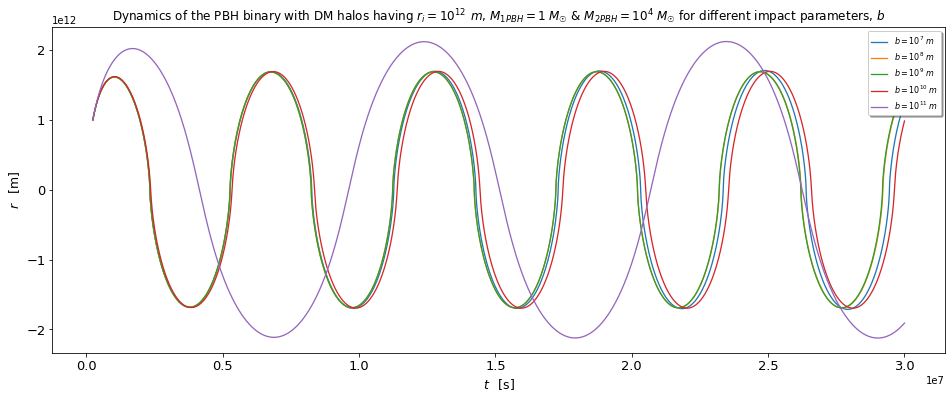

In [9]:
# Dynamics of the PBH binaries in proper coordinates with PBHs of masses, M_1PBH & M_2PBH at 
# an initial separation of r_i=1e12m, M_1PBH = 1 M☉ &  M_2PBH = 100 M☉ having 
# DM halos of sizes equal to their own.
 
# Using different impact parameters, b.
    
    
plt.figure(figsize=(16,6))

M_1PBH=1*M_solar      # in units of M☉. 
M_2PBH=1e4*M_solar    # in units of M☉.

M_1halo=1*M_solar      # in units of M☉. 
M_2halo=1e4*M_solar    # in units of M☉.


b=1e8
while b<1e13:
    def f(u,w):   #Eq.(33) in "PBH-binary" notes.
        return [u[1], (((-G*(M_1PBH+M_2PBH+M_1halo+M_2halo)*u[0])/((u[0]**2+b**2)**(3/2))) - (u[0]/(4*w**2)))]
    r0= [1e12,2.12044e6]
    ws= np.linspace(2.358e5,3e7,3000)
    us= odeint(f,r0,ws)
    rs= us[:,0]
    plt.plot(ws,rs,'')
    b*=10

    

plt.rc('lines', linewidth=1.3)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)

plt.xlabel('$t$ $\hspace{0.5}$[s]',fontsize=12.5)
plt.ylabel('$r$$\hspace{0.5}$ [m]',fontsize=12.5)
    
    
    
plt.title('Dynamics of the PBH binary with DM halos having $r_{i}=10^{12}\hspace{0.4}m$, $M_{1PBH} = 1\hspace{0.3} M_{☉}$ & $M_{2PBH} = 10^{4}\hspace{0.3} M_{☉}$ for different impact parameters, $b$')
plt.legend(["$b=10^{7}\hspace{0.3}m$","$b=10^{8}\hspace{0.3}m$","$b=10^{9}\hspace{0.3}m$","$b=10^{10}\hspace{0.3}m$","$b=10^{11}\hspace{0.3}m$","$b=10^{12}\hspace{0.3}m$"],prop = {'size':8}, facecolor = 'white',loc='upper right', shadow = True,fontsize=33) 
plt.savefig("6.pdf")
plt.show()

In [11]:
#Definition of the mass of the DM halos and the time of decoupling as per "PBH-binary"-notes.

def t(s):  # Time of binary decouple, t_dec given  by eq.(32) in "PBH-binary" notes.
    return ((math.sqrt(3/(8*π*G*ρ_eq)))*(((2/3)*(s-2)*math.sqrt(s+1))+(4/3)))

def ρ_bar(M_PBH):
    return ((ρ_eq/2)*(t_eq**(3/2))*((2*G*M_PBH)**(3/4)))


def M_halo(M_PBH,s):#Initial mass of the dark halo of PBH having mass M_PBH given by eq.(24) in "PBH-binary" notes.          
    return (((16*π)/3)*ρ_bar(M_PBH)*((2*G*M_PBH*(t(s)**2))**(1/4)))

def n(s): #Eq.(42) in "PBH-binary" notes.
    return (1/(1+((M_halo(M_1PBH,s)+M_halo(M_2PBH,s))/(M_1PBH+M_2PBH))))
                   
def λ(s): #Eq.(40) in "PBH-binary" notes.
    return λ_0*n(s)
   

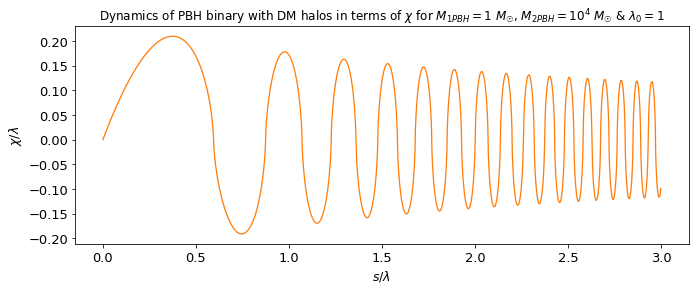

In [12]:
# Dynamics of the PBH binaries in dimensionless coordinates, χ with PBHs of masses, M_1PBH & M_2PBH at 
# an initial separation of r_i=1e12m, M_1PBH = 1 M☉ &  M_2PBH = 100 M☉ having 
# DM halos of sizes equal to their own.

plt.figure(figsize=(11,4)) 

λ_0=1                    # λ_0=(8πρ_eqx^3)/3(M_1PBH+M_2PBH).
M_1PBH=1*M_solar         # in units of M☉. 
M_2PBH=1e4*M_solar       # in units of M☉.



def f(u,s,λ_0): #Eq.(37) in "PBH-binary" notes.
    return [u[1], -((s*g(s)+h(s))*((s*u[1]-u[0]))/(h(s)*s**2))-((u[0])/((((h(s)*s)**2))*λ(s)
                     *((u[0]**2+b**2)**(3/2))))]   
separation0= [1e-12,1]
b= (3*λ_0)/100000
ss= np.linspace(1e-12,((9*λ_0)/3),100000) 
us= odeint(f,separation0,ss,args=( λ_0,))
separations= us[:,0]
As=ss/λ_0
Bs=separations/λ_0
plt.plot(As,Bs,'C1')
    

plt.rc('lines', linewidth=1.3)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)


plt.xlabel('$s/λ$',fontsize=12.5)
plt.ylabel('$χ/λ$',fontsize=12.5)
    
plt.title('Dynamics of PBH binary with DM halos in terms of $χ$ for $M_{1PBH} = 1\hspace{0.3} M_{☉}$, $M_{2PBH} = 10^{4}\hspace{0.3} M_{☉}$ & $λ_{0}=1$')
plt.savefig('7.pdf')
plt.show()

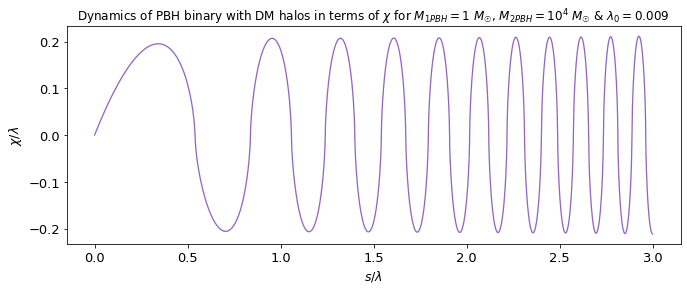

In [13]:
# Dynamics of the PBH binaries in dimensionless coordinates, χ with PBHs of masses, M_1PBH & M_2PBH at 
# an initial separation of r_i=1e12m, M_1PBH = 1 M☉ &  M_2PBH = 100 M☉ having 
# DM halos of sizes equal to their own.




plt.figure(figsize=(11,4)) 

λ_0=0.009                # λ_0=(8πρ_eqx^3)/3(M_1PBH+M_2PBH).
M_1PBH=1*M_solar         # in units of M☉. 
M_2PBH=1e4*M_solar       # in units of M☉.


def f(u,s,λ_0): #Eq.(37) in "PBH-binary" notes.
    return [u[1], -((s*g(s)+h(s))*((s*u[1]-u[0]))/(h(s)*s**2))-((u[0])/((((h(s)*s)**2))*λ(s)
                     *((u[0]**2+b**2)**(3/2))))]   
separation0= [1e-12,1]
b= (3*λ_0)/100000
ss= np.linspace(1e-12,((9*λ_0)/3),100000) 
us= odeint(f,separation0,ss,args=( λ_0,))
separations= us[:,0]
As=ss/λ_0
Bs=separations/λ_0
plt.plot(As,Bs,'C4')
    

plt.rc('lines', linewidth=1.3)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)


plt.xlabel('$s/λ$',fontsize=12.5)
plt.ylabel('$χ/λ$',fontsize=12.5)
    
plt.title('Dynamics of PBH binary with DM halos in terms of $χ$ for $M_{1PBH} = 1\hspace{0.3} M_{☉}$, $M_{2PBH} = 10^{4}\hspace{0.3} M_{☉}$ & $λ_{0}=0.009$')
plt.savefig('8.pdf')
plt.show()

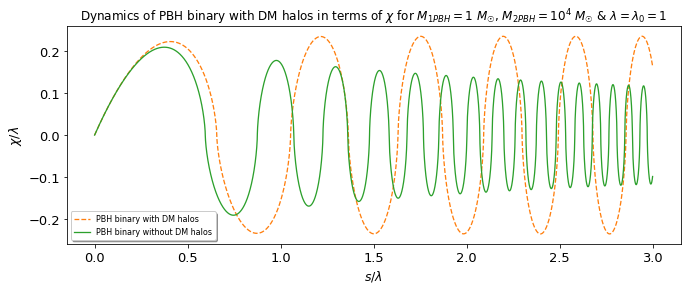

In [14]:
# Comparison of the dynamics of the PBH binary without DM halos with that of the PBH binary with DM halos 
# in terms of the dimensionless coordinates, χ for λ_0=λ=1.

# Here, λ_0=λ=(8πρ_eqx^3)/3(M_1PBH+M_2PBH).

plt.figure(figsize=(11,4)) 
M_1PBH=1*M_solar         # in units of M☉. 
M_2PBH=1e4*M_solar       # in units of M☉.


#PBH binaries without DM halos.
def j(n,p):  #Eq.(16) in "PBH-binary" notes.
    return [n[1], -((p*g(p)+h(p))*((p*n[1]-n[0]))/(h(p)*p**2))-((n[0])/((((h(p)*p)**2))*
                                                            λ*((n[0]**2+c**2)**(3/2))))]
                   
z0= [1e-12,1]
λ=1
c=1e-4
ps= np.linspace(1e-12,3,100000) 
ns= odeint(j,z0,ps)
zs= ns[:,0]
Ps=ps/λ
Zs=zs/λ   
plt.plot(Ps,Zs,'C1--')   
    
    

#PBH binaries with DM halos.   
def λ(s): #Eq.(40) in "PBH-binary" notes.
    return λ_0*n(s)
def f(u,s,λ_0): #Eq.(37) in "PBH-binary" notes.
    return [u[1], -((s*g(s)+h(s))*((s*u[1]-u[0]))/(h(s)*s**2))-((u[0])/((((h(s)*s)**2))*λ(s)
                     *((u[0]**2+b**2)**(3/2))))]   
separation0= [1e-12,1]
λ_0=1 
b= (3*λ_0)/100000
ss= np.linspace(1e-12,((9*λ_0)/3),100000) 
us= odeint(f,separation0,ss,args=( λ_0,))
separations= us[:,0]
As=ss/λ_0
Bs=separations/λ_0
plt.plot(As,Bs,'C2')
    

    

plt.rc('lines', linewidth=1.3)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)


plt.xlabel('$s/λ$',fontsize=12.5)
plt.ylabel('$χ/λ$',fontsize=12.5)
    
plt.title('Dynamics of PBH binary with DM halos in terms of $χ$ for $M_{1PBH} = 1\hspace{0.3} M_{☉}$, $M_{2PBH} = 10^{4}\hspace{0.3} M_{☉}$ & $λ=λ_{0}=1$')
plt.legend(["PBH binary with DM halos","PBH binary without DM halos"],prop = {'size':8}, facecolor = 'white',
           loc='lower left', shadow = True,fontsize=33) 
plt.savefig("9.pdf")
plt.show()

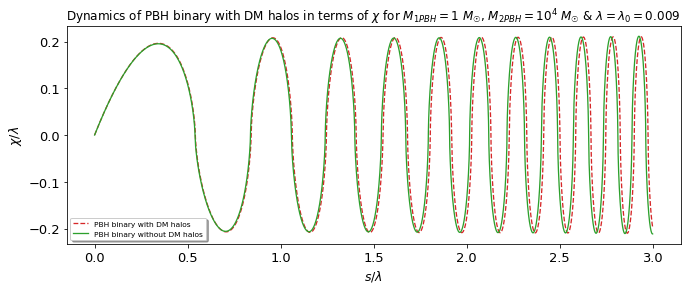

In [15]:
# Comparison of the dynamics of the PBH binary without DM halos with that of the PBH binary with DM halos 
# in terms of the dimensionless coordinates, χ for λ_0=λ=0.009<<1(corresponding to the radiation dominated 
# era).

# Here, λ_0=λ=(8πρ_eqx^3)/3(M_1PBH+M_2PBH).

plt.figure(figsize=(11,4)) 
M_1PBH=1*M_solar         # in units of M☉. 
M_2PBH=1e4*M_solar       # in units of M☉.


#PBH binaries without DM halos.    
def j(n,p):  #Eq.(16) in "PBH-binary" notes.
    return [n[1], -((p*g(p)+h(p))*((p*n[1]-n[0]))/(h(p)*p**2))-((n[0])/((((h(p)*p)**2))*
                                                            λ*((n[0]**2+c**2)**(3/2))))]
                   
z0= [1e-12,1]
λ=0.009
c=1e-6
ps= np.linspace(1e-12,2.7e-2,100000) 
ns= odeint(j,z0,ps)
zs= ns[:,0]
Ps=ps/λ
Zs=zs/λ   
plt.plot(Ps,Zs,'C3--')   
    


                   

#PBH binaries with DM halos.        
def λ(s):
    return λ_0*n(s)
   
def f(u,s,λ_0):  #Eq.(37) in "PBH-binary" notes.
    return [u[1], -((s*g(s)+h(s))*((s*u[1]-u[0]))/(h(s)*s**2))-((u[0])/((((h(s)*s)**2))*λ(s)
                     *((u[0]**2+b**2)**(3/2))))]   
separation0= [1e-12,1]
λ_0=0.009
b= (3*λ_0)/100000
ss= np.linspace(1e-12,((9*λ_0)/3),100000) 
us= odeint(f,separation0,ss,args=( λ_0,))
separations= us[:,0]
As=ss/λ_0
Bs=separations/λ_0
plt.plot(As,Bs,'C2')
    


    
plt.rc('lines', linewidth=1.3)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)


plt.xlabel('$s/λ$',fontsize=12.5)
plt.ylabel('$χ/λ$',fontsize=12.5)
    
plt.title('Dynamics of PBH binary with DM halos in terms of $χ$ for $M_{1PBH} = 1\hspace{0.3} M_{☉}$, $M_{2PBH} = 10^{4}\hspace{0.3} M_{☉}$ & $λ=λ_{0}=0.009$')
plt.legend(["PBH binary with DM halos","PBH binary without DM halos"],prop = {'size':7.5}, facecolor = 'white',
           loc='lower left', shadow = True,fontsize=33) 
plt.savefig("10.pdf")
plt.show()

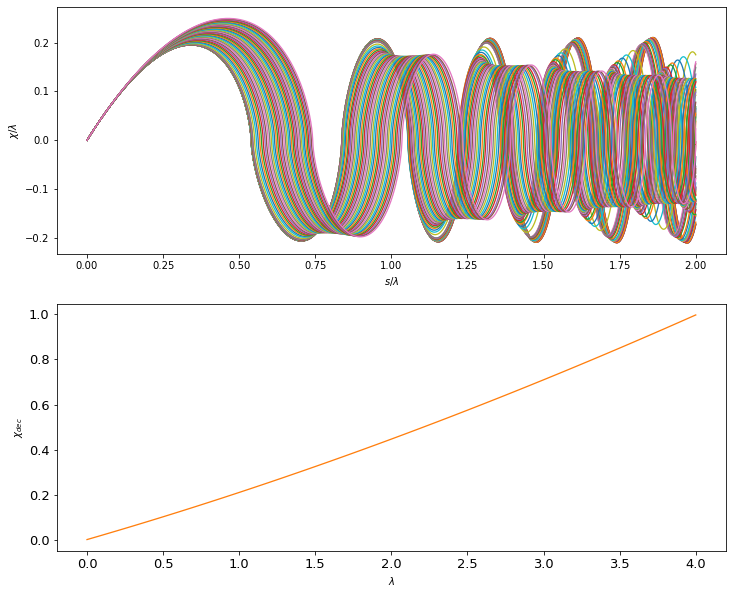

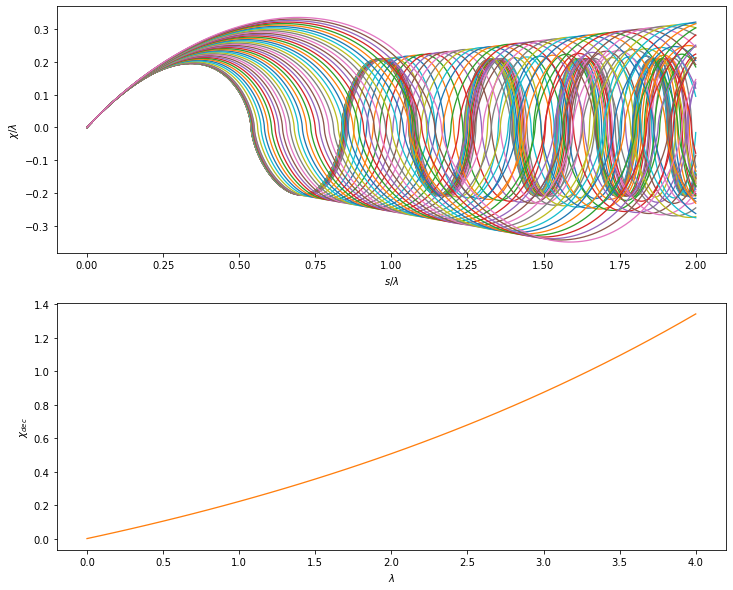

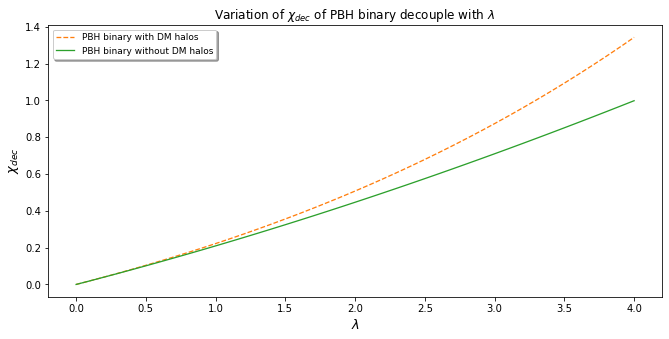

In [16]:
# Comparison of the χ_dec-values of the PBH binary decouple from Hubble Expansion with and 
#without DM halos using different values of λ.

fig, ax = plt.subplots(2,figsize=(12, 10))    
plt.rc('lines', linewidth=1.3)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)



λ_list=[0.0001,0.0002,0.0003,0.0004,0.0005,0.0006,0.0007,0.0008,0.0009,0.001, 0.002, 0.003, 0.004,
          0.005, 0.006, 0.007, 0.008, 0.009, 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09,
        0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0,1.1,1.2,1.3,1.4,1.5,1.6,1.7,1.8,1.9,2.0,2.1,2.2,2.3,
        2.4,2.5,2.6,2.7,2.8,2.9,3.0,3.1,3.2,3.3,3.4,3.5,3.6,3.7,3.8,3.9,4.0]

def λ(s):
    return λ_0*n(s)

#PBH binaries with DM halos.

def χ_dec_halo(λ_0):    # Function to calculate χ_dec of the PBH binary decouple from Hubble Expansion.
    def f(u,s,λ_0):     #Eq.(37) in "PBH-binary" notes.
            return [u[1], -((s*g(s)+h(s))*((s*u[1]-u[0]))/(h(s)*s**2))-((u[0])/((((h(s)*s)**2))*λ(s)
                     *((u[0]**2+b**2)**(3/2))))]   
    separation0= [1e-12,1]
    b= (3*λ_0)/100000
    ss= np.linspace(1e-12,((6*λ_0)/3),100000) 
    us= odeint(f,separation0,ss,args=( λ_0,))
    separations= us[:,0]
    As=ss/λ_0
    Bs=separations/λ_0
    ax[0].plot(As,Bs,'')
    ax[0].set(xlabel="$s/λ$", ylabel="$χ/λ$")
    λ_0+=0.0001
    Bs_list = Bs.tolist()
    As_list = As.tolist()
    for i in  range(1,len(Bs_list)):
        Δ=(Bs[i] - Bs[i-1])
        χ=(Bs[i-1]*λ_0)             # As Bs=χ/λ_0.
        if Δ<0:
            break
        
    return χ


χ_dec_halo_list = np.zeros(len(λ_list))
for i, λ_0 in enumerate(λ_list):
     χ_dec_halo_list[i] = χ_dec_halo(λ_0)


ax[1].plot(λ_list,χ_dec_halo_list,'C1')
ax[1].set(xlabel="$λ$", ylabel="$χ_{dec}$")





#PBH binaries without DM halos.
fig, ax = plt.subplots(2,figsize=(12, 10))

def χ_dec(λ_0):      #Function to calculate χ_dec of the PBH binary decouple from Hubble Expansion. 
    def f(u,s,λ_0):  #Eq.(16) in "PBH-binary" notes.
            return [u[1], -((s*g(s)+h(s))*((s*u[1]-u[0]))/(h(s)*s**2))-((u[0])/((((h(s)*s)**2))*λ_0
                     *((u[0]**2+b**2)**(3/2))))]   
    separation0= [1e-12,1]
    b= (3*λ_0)/100000
    ss= np.linspace(1e-12,((6*λ_0)/3),100000) 
    us= odeint(f,separation0,ss,args=( λ_0,))
    separations= us[:,0]
    As=ss/λ_0
    Bs=separations/λ_0
    ax[0].plot(As,Bs,'')
    ax[0].set(xlabel="$s/λ$", ylabel="$χ/λ$")
    λ_0+=0.0001
    Bs_list = Bs.tolist()
    As_list = As.tolist()
    for i in  range(1,len(Bs_list)):
        Δ=(Bs[i] - Bs[i-1])
        χ=(Bs[i-1]*λ_0)             # As Bs=χ/λ_0.
        if Δ<0:
            break
        
    return χ



χ_dec_list = np.zeros(len(λ_list))
for i, λ_0 in enumerate(λ_list):
     χ_dec_list[i] = χ_dec(λ_0)


ax[1].plot(λ_list,χ_dec_list,'C1')
ax[1].set(xlabel="$λ$", ylabel="$χ_{dec}$")


plt.figure(figsize=(11,5))
plt.plot(λ_list,χ_dec_list,'C1--')
plt.plot(λ_list,χ_dec_halo_list,'C2')
plt.xlabel("$λ$",fontsize=13)
plt.ylabel("$χ_{dec}$",fontsize=13)

plt.title('Variation of $χ_{dec}$ of PBH binary decouple with $λ$ ')
plt.legend(["PBH binary with DM halos","PBH binary without DM halos"],prop = {'size':9}, facecolor = 'white',
           loc='upper left', shadow = True,fontsize=33) 
plt.savefig("10.pdf")
plt.show()


#The last graph shows that for λ<<1 which correspond to the radiation dominated era, 
#the behaviour of a PBH binary  having DM halos being accreted around the PBHs is not 
#significantly different from the same binary having no DM halos. But for  λ≈1 or λ>1, the size of the 
# binary orbits with DM halos is comparatively smaller.

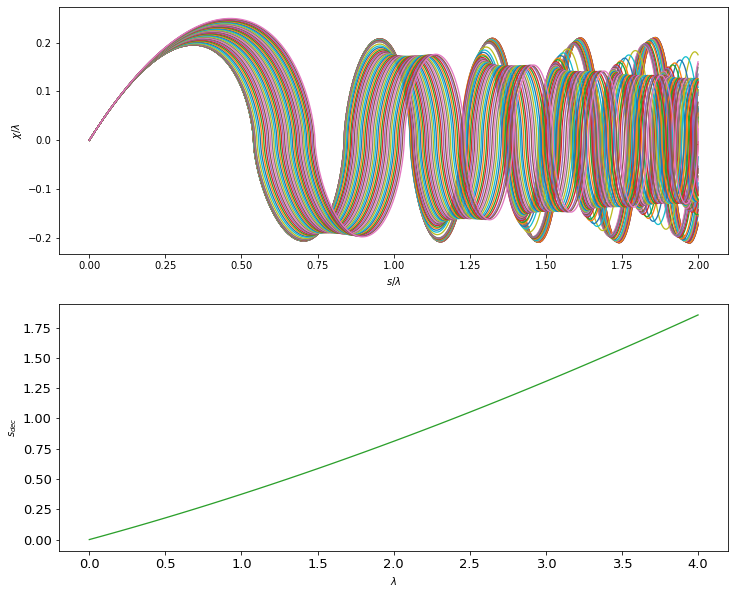

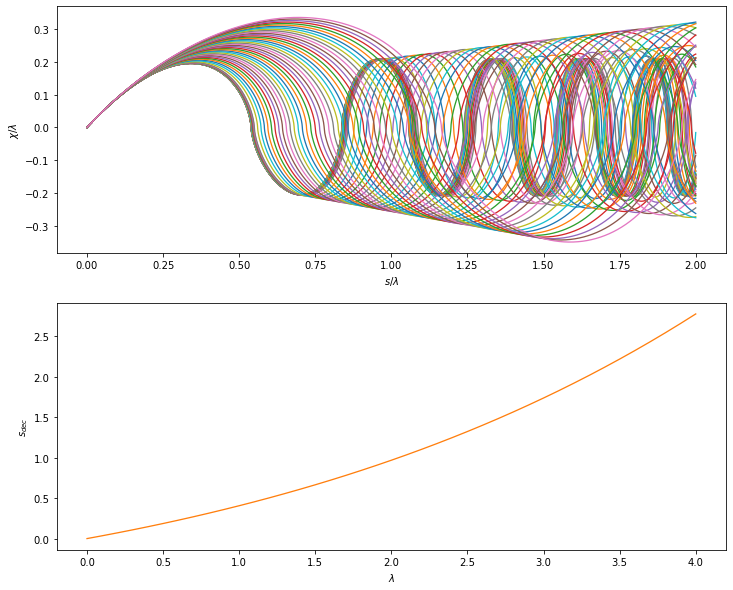

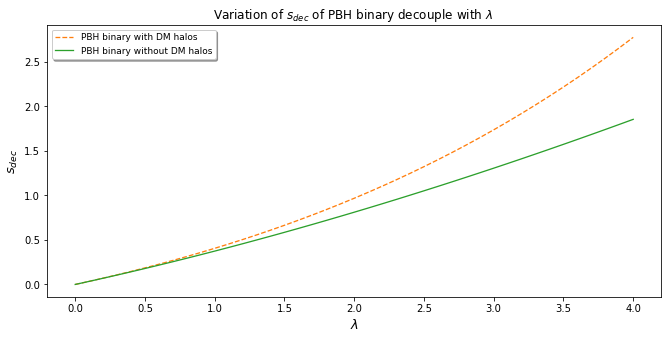

In [17]:
# Comparison of the s_dec-values of the PBH binary decouple from Hubble Expansion with and 
#without DM halos using different values of λ.

fig, ax = plt.subplots(2,figsize=(12, 10))    
plt.rc('lines', linewidth=1.3)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)



#PBH binaries with DM halos.
def λ(s):
    return λ_0*n(s)

def s_dec_halo(λ_0):   #Function to calculate the scale-factor of the PBH binary decouple from Hubble flow.
    def f(u,s,λ_0):    #Eq.(37) in "PBH-binary" notes.
            return [u[1], -((s*g(s)+h(s))*((s*u[1]-u[0]))/(h(s)*s**2))-((u[0])/((((h(s)*s)**2))*λ(s)
                     *((u[0]**2+b**2)**(3/2))))]   
    separation0= [1e-12,1]
    b= (3*λ_0)/100000
    ss= np.linspace(1e-12,((6*λ_0)/3),100000) 
    us= odeint(f,separation0,ss,args=( λ_0,))
    separations= us[:,0]
    As=ss/λ_0
    Bs=separations/λ_0
    ax[0].plot(As,Bs,'')
    ax[0].set(xlabel="$s/λ$", ylabel="$χ/λ$")
    Bs_list = Bs.tolist()
    As_list = As.tolist()
    for i in  range(1,len(Bs_list)):
        Δ=(Bs[i] - Bs[i-1])
        s=(As[i]*λ_0)             # As ss=s/λ_0.
        if Δ<0:
            break
        
    return s



s_dec_halo_list = np.zeros(len(λ_list))
for i, λ_0 in enumerate(λ_list):
     s_dec_halo_list[i] = s_dec_halo(λ_0)


ax[1].plot(λ_list,s_dec_halo_list,'C2')
ax[1].set(xlabel="$λ$", ylabel="$s_{dec}$")





#PBH binaries without DM halos.
fig, ax = plt.subplots(2,figsize=(12, 10))

def s_dec(λ_0):       #Function to calculate the scale-factor of the PBH binary decouple from Hubble flow.
    def f(u,s,λ_0):   #Eq.(37) in "PBH-binary" notes.
            return [u[1], -((s*g(s)+h(s))*((s*u[1]-u[0]))/(h(s)*s**2))-((u[0])/((((h(s)*s)**2))*λ_0
                     *((u[0]**2+b**2)**(3/2))))]   
    separation0= [1e-12,1]
    b= (3*λ_0)/100000
    ss= np.linspace(1e-12,((6*λ_0)/3),100000) 
    us= odeint(f,separation0,ss,args=( λ_0,))
    separations= us[:,0]
    As=ss/λ_0
    Bs=separations/λ_0
    ax[0].plot(As,Bs,'')
    ax[0].set(xlabel="$s/λ$", ylabel="$χ/λ$")
    Bs_list = Bs.tolist()
    As_list = As.tolist()
    for i in  range(1,len(Bs_list)):
        Δ=(Bs[i] - Bs[i-1])
        s=(As[i]*λ_0)             # As ss=s/λ_0.
        if Δ<0:
            break
        
    return s



s_dec_list = np.zeros(len(λ_list))
for i, λ_0 in enumerate(λ_list):
     s_dec_list[i] = s_dec(λ_0)


ax[1].plot(λ_list,s_dec_list,'C1')
ax[1].set(xlabel="$λ$", ylabel="$s_{dec}$")


plt.figure(figsize=(11,5))
plt.plot(λ_list,s_dec_list,'C1--')
plt.plot(λ_list,s_dec_halo_list,'C2')
plt.xlabel("$λ$",fontsize=13)
plt.ylabel("$s_{dec}$",fontsize=13)

plt.title('Variation of $s_{dec}$ of PBH binary decouple with $λ$ ')
plt.legend(["PBH binary with DM halos","PBH binary without DM halos"],prop = {'size':9}, facecolor = 'white',
           loc='upper left', shadow = True,fontsize=33) 
plt.savefig("11.pdf")
plt.show()

# This graph also shows that for λ≈1 or λ>1, PBH binary having DM halos decouples earlier 
# than the  same binary with no DM halos and hence is smaller in size comparatively.

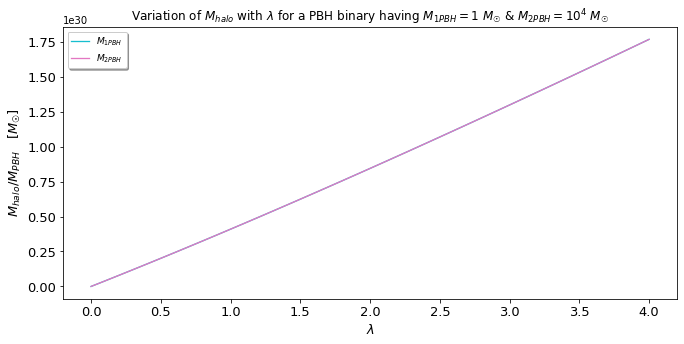

In [18]:
# Estimate of the mass of the DM halos in the PBH binary at the point of 
# decoupling, s_dec for PBH binary.

M_1PBH=1*M_solar         # in units of M☉. 
M_2PBH=1e4*M_solar       # in units of M☉.


M_1halo_list = np.zeros(len(λ_list))
for i, s in enumerate(s_dec_halo_list):
     M_1halo_list[i] = M_halo(M_1PBH,s)


M_2halo_list = np.zeros(len(λ_list))
for i, s in enumerate(s_dec_halo_list):
     M_2halo_list[i] = M_halo(M_2PBH,s)
        

plt.figure(figsize=(11,5))
plt.rc('lines', linewidth=1.3)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
        

plt.plot(λ_list,(M_2halo_list*1e-4),'C9')    
plt.plot(λ_list,(M_1halo_list),'C6')



plt.xlabel("$λ$",fontsize=13)
plt.ylabel("$M_{halo}/M_{PBH} \hspace{1}[M_{☉}]$",fontsize=13)

plt.title('Variation of $M_{halo}$ with $λ$ for a PBH binary having $M_{1PBH} = 1\hspace{0.3} M_{☉}$ & $M_{2PBH} = 10^{4}\hspace{0.3} M_{☉}$')
plt.legend(["$M_{1PBH}$","$M_{2PBH}$"],prop = {'size':9}, facecolor = 'white',
           loc='upper left', shadow = True,fontsize=33) 

plt.show()

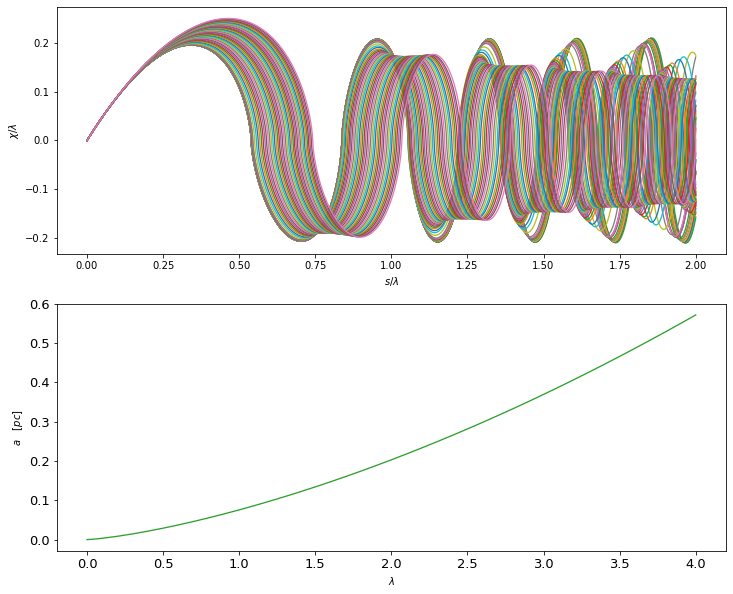

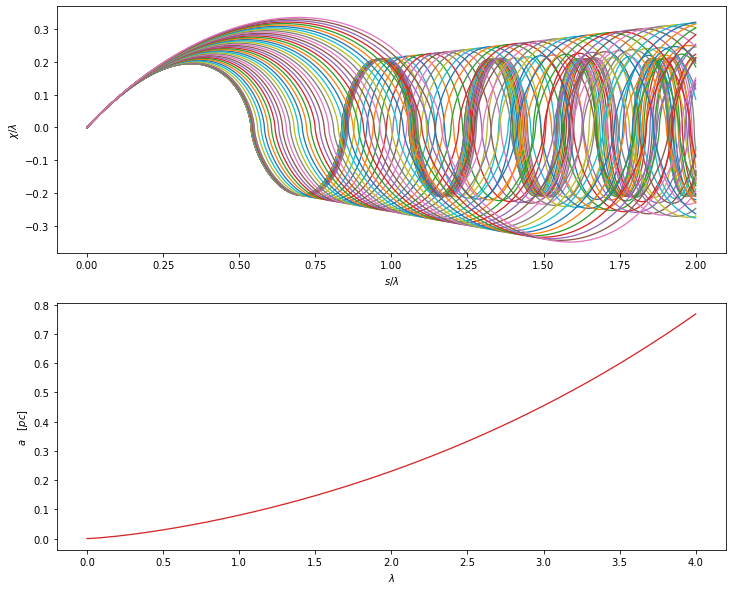

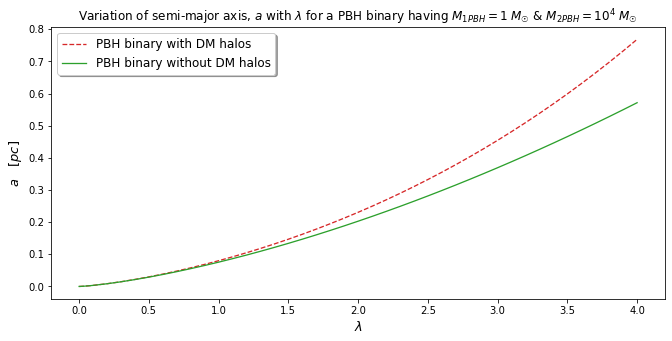

In [19]:
# Comparison of the values of the semi-major axis, a of the PBH binary decouple from 
# Hubble Expansion with and without DM halos using different values of λ.

fig, ax = plt.subplots(2,figsize=(12, 10))    
plt.rc('lines', linewidth=1.3)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)

M_1PBH=1*M_solar         # in units of M☉. 
M_2PBH=1e4*M_solar       # in units of M☉.

pc=3.085e16              # in units of meter
C=1/pc



#PBH binaries with DM halos.
def λ(s):
    return λ_0*n(s)

def a_halo(λ_0):      #Function to calculate the initial semi-major axis of the PBH binary
    def f(u,s,λ_0):   #Eq.(37) in "PBH-binary" notes.
        return [u[1], -((s*g(s)+h(s))*((s*u[1]-u[0]))/(h(s)*s**2))-((u[0])/((((h(s)*s)**2))*λ(s)
                     *((u[0]**2+b**2)**(3/2))))]    
    separation0= [1e-12,1]
    b=(3*λ_0)/100000
    ss= np.linspace(1e-12,((6*λ_0)/3),1000000) 
    us= odeint(f,separation0,ss,args=( λ_0,))
    separations= us[:,0]
    As=ss/λ_0
    Bs=separations/λ_0
    ax[0].plot(As,Bs,'')
    ax[0].set(xlabel="$s/λ$", ylabel="$χ/λ$")
    Bs_list = Bs.tolist()
    As_list = As.tolist()
    for i in  range(1,len(Bs_list)):
        Δ=(Bs[i] - Bs[i-1])
        A=Bs[i]
        semi=(((A/2)*λ_0))                   #As Bs=separations/λ_0.
        if Δ<0:
            x=(((3*(M_1PBH+M_2PBH)*λ_0)/(8*π*ρ_eq))**(1/3))    # The initial comoving separation of the PBH binary in units of meter.
            a=(x*semi)
            break
        
    
    return a





a_halo_list = np.zeros(len(λ_list))
for i, λ_0 in enumerate(λ_list):
     a_halo_list[i] = a_halo(λ_0)


ax[1].plot(λ_list,a_halo_list*C,'C2')
ax[1].set(xlabel="$λ$", ylabel="$a \hspace{1}[pc]$")





#PBH binaries without DM halos.
fig, ax = plt.subplots(2,figsize=(12, 10))

def a(λ_0):           #Function to calculate the initial semi-major axis of the PBH binary
    def f(u,s,λ_0):   #Eq.(16) in "PBH-binary" notes.
        return [u[1], -((s*g(s)+h(s))*((s*u[1]-u[0]))/(h(s)*s**2))-((u[0])/((((h(s)*s)**2))*λ_0
                     *((u[0]**2+b**2)**(3/2))))]    
    separation0= [1e-12,1]
    b=(3*λ_0)/100000
    ss= np.linspace(1e-12,((6*λ_0)/3),1000000) 
    us= odeint(f,separation0,ss,args=( λ_0,))
    separations= us[:,0]
    As=ss/λ_0
    Bs=separations/λ_0
    ax[0].plot(As,Bs,'')
    ax[0].set(xlabel="$s/λ$", ylabel="$χ/λ$")
    Bs_list = Bs.tolist()
    As_list = As.tolist()
    for i in  range(1,len(Bs_list)):
        Δ=(Bs[i] - Bs[i-1])
        A=Bs[i]
        semi=(((A/2)*λ_0))                   #As Bs=separations/λ_0.
        if Δ<0:
            x=(((3*(M_1PBH+M_2PBH)*λ_0)/(8*π*ρ_eq))**(1/3))    # The initial comoving separation of the PBH binary in units of meter.
            a=(x*semi)
            break
        
    
    return a





a_list = np.zeros(len(λ_list))
for i, λ_0 in enumerate(λ_list):
     a_list[i] = a(λ_0)


ax[1].plot(λ_list,a_list*C,'C3')
ax[1].set(xlabel="$λ$", ylabel="$a\hspace{1}[pc]$")


plt.figure(figsize=(11,5))
plt.plot(λ_list,a_list*C,'C3--')
plt.plot(λ_list,a_halo_list*C,'C2')
plt.xlabel("$λ$",fontsize=13)
plt.ylabel("$a\hspace{1}[pc]$",fontsize=13)

plt.title('Variation of semi-major axis, $a$ with $λ$ for a PBH binary having $M_{1PBH} = 1\hspace{0.3} M_{☉}$ & $M_{2PBH} = 10^{4}\hspace{0.3} M_{☉}$')
plt.legend(["PBH binary with DM halos","PBH binary without DM halos"],prop = {'size':12}, facecolor = 'white',
           loc='upper left', shadow = True,fontsize=33) 
plt.savefig("12.pdf")
plt.show()

# This graph also shows that for λ≈1 or λ>1, PBH binary having DM halos decouples earlier 
# than the same binary with no DM halos and hence is smaller in size comparatively.